# _Decades of Hunger: A Global Look at Famine Deaths_ 

### _"Recent conflicts in regions such as Gaza have highlighted the devastating impact of modern famines, particularly those driven by political and military factors."_


In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import plotly.express as px
import seaborn as sns
from sklearn.ensemble import IsolationForest
from sklearn.linear_model import LinearRegression
from matplotlib.ticker import FuncFormatter


## 1. Load & Clean Data
_A function to ingest the CSV, extract countries, impute missing GDP values, and derive decades._

In [2]:
path = "/kaggle/input/famines-by-level-of-gdp-per-capita-at-the-time/famines-by-level-of-gdp-per-capita-at-the-time.csv"

def load_and_clean(path):
    """
    Load the famine dataset and perform basic cleaning:
      - Read CSV into DataFrame
      - Extract country names from 'Entity'
      - Fill missing GDP per capita values with the column mean
      - Add a 'Decade' column derived from the 'Year'
    Returns the cleaned DataFrame.
    """
    df = pd.read_csv(path)
    # Remove trailing numbers from 'Entity' to get clean country names
    df['Country'] = df['Entity'].str.replace(r'\s+\d.*$', '', regex=True)
    # Impute missing GDP values with column average
    df['GDP per capita'] = df['GDP per capita'].fillna(df['GDP per capita'].mean())
    # Group years into decades (e.g., 1980s, 1990s, ...)
    df['Decade'] = (df['Year'] // 10 * 10).astype(int)
    return df
    
# Load and clean the data
df = load_and_clean(path)

## 2. Display Data Overview
_Show DataFrame info, sample rows, descriptive statistics, null counts, and duplicate summary._


In [3]:
def display_overview(df):
    """
    Display basic information about the dataset:
      - DataFrame info (column types, non-null counts)
      - First few rows for preview
      - Descriptive statistics for all columns
      - Count of null values and duplicate rows
    """
    print("Data Overview")
    print(df.info(), "\n")  # Column types and counts
    display(df.head().T)  # Transposed head for readability
    display(df.describe(include='all').T)  # Descriptive stats
    print("Nulls:\n", df.isnull().sum(), "\nDuplicates:", df.duplicated().sum())

# Show initial data diagnostics
display_overview(df)

Data Overview
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 79 entries, 0 to 78
Data columns (total 7 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   Entity               79 non-null     object 
 1   Year                 79 non-null     int64  
 2   GDP per capita       79 non-null     float64
 3   Deaths from famines  79 non-null     int64  
 4   Principal cause      79 non-null     object 
 5   Country              79 non-null     object 
 6   Decade               79 non-null     int64  
dtypes: float64(1), int64(3), object(3)
memory usage: 4.4+ KB
None 



,0,1,2,3,4
Entity,Armenia 1919,Bangladesh 1974,Brazil 1876-1879,Cambodia 1975-1979,Central African Republic 2020-2023
Year,1919,1974,1876,1975,2020
GDP per capita,1844.113706,872.0,1081.0,925.0,613.78937
Deaths from famines,200000,1500000,500000,1210000,553000
Principal cause,Armed conflict,Government policies,Adverse climate,Government policies,Armed conflict
Country,Armenia,Bangladesh,Brazil,Cambodia,Central African Republic
Decade,1910,1970,1870,1970,2020


,count,unique,top,freq,mean,std,min,25%,50%,75%,max
Entity,79,79,Armenia 1919,1,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Year,79.0,NaN,NaN,NaN,1941.291139,40.576345,1870.0,1913.5,1940.0,1974.5,2021.0
GDP per capita,79.0,NaN,NaN,NaN,1844.113706,1022.690371,472.92395,1019.0,1844.113706,1892.056853,5337.1294
Deaths from famines,79.0,NaN,NaN,NaN,1769660.759494,4364549.819574,100000.0,245000.0,500000.0,1350000.0,36000000.0
Principal cause,79,4,Armed conflict,40,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Country,79,49,China,8,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Decade,79.0,NaN,NaN,NaN,1936.962025,41.27315,1870.0,1910.0,1940.0,1970.0,2020.0


Nulls:
 Entity                 0
Year                   0
GDP per capita         0
Deaths from famines    0
Principal cause        0
Country                0
Decade                 0
dtype: int64 
Duplicates: 0


## 3. Configure Global Styles
_Set Seaborn theme and Matplotlib defaults for consistent figure aesthetics._


In [4]:
# Configure global visualization styles
sns.set_theme(style="whitegrid")
plt.rcParams.update({
    "figure.figsize": (10, 6),
    "axes.titlesize": 14,
    "axes.labelsize": 12,
    "xtick.labelsize": 10,
    "ytick.labelsize": 10
})

## 4. Top 10 Countries by Total Deaths
_Horizontal bar chart highlighting the countries with the highest cumulative famine fatalities._


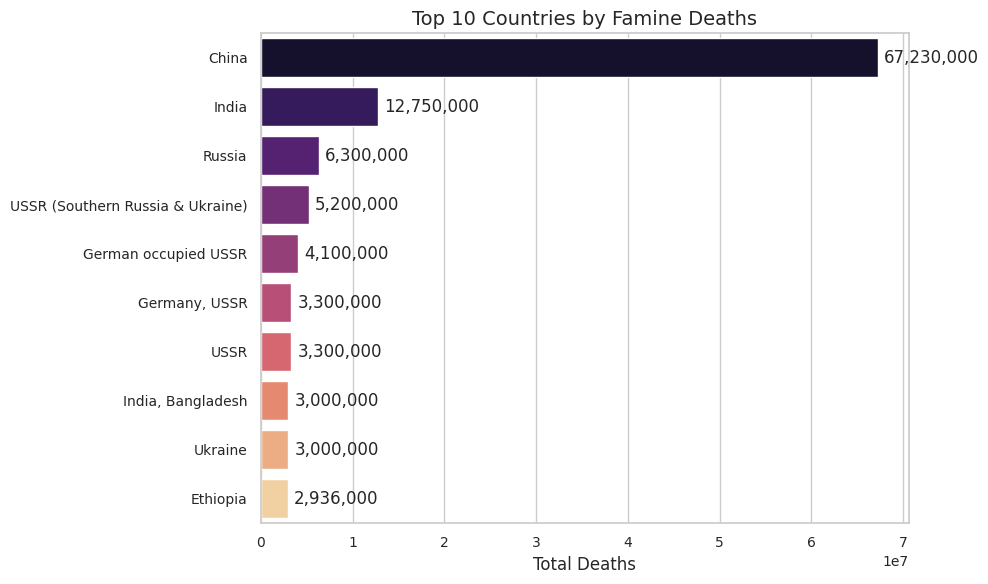

In [5]:
def bar_top_countries(df, n=10):
    """
    Display a horizontal bar chart of the top N countries by total famine deaths.
    Adds data labels for clarity.
    """
    # Identify top N countries
    top = df.groupby('Country')['Deaths from famines'].sum().nlargest(n)
    # Plot bar chart
    sns.barplot(x=top.values, y=top.index, palette='magma')
    # Annotate each bar with its value
    for i, v in enumerate(top.values):
        plt.text(v + top.values.max() * 0.01, i, f"{v:,}", va='center')
    plt.title(f"Top {n} Countries by Famine Deaths")
    plt.xlabel("Total Deaths")
    plt.ylabel("")
    plt.tight_layout()
    plt.show()

# Visualize top 10 countries
bar_top_countries(df, n=10)

### Key Findings
- China has the highest recorded famine deaths at 67.23 million.
- India follows with 12.75 million deaths, significantly lower than China.
- Multiple entries for USSR and India suggest recurring famine events across different periods or regions.

## 5. Stacked Bar: Top 6 Countries
_Stacked bar chart of decade‑by‑decade deaths for the six worst‑hit countries, grouping all others into “Other.”_

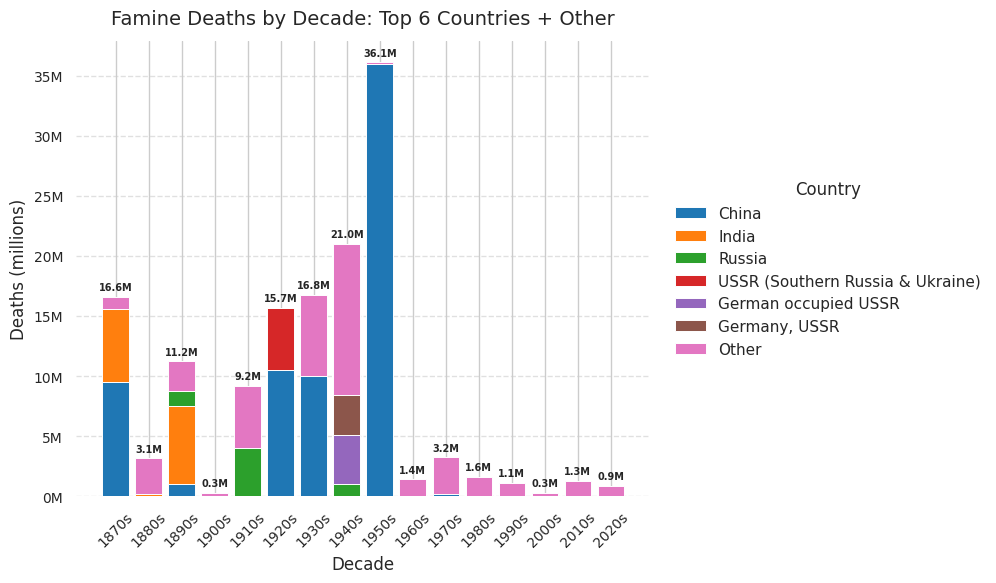

In [6]:
def plot_top_countries_stacked(data, top_n=6):
    """
    Show a stacked bar chart of famine deaths by decade for the top N countries
    plus an 'Other' category grouped together.
    """

    # Select the top N countries by total deaths
    top_countries = (
        data.groupby('Country')['Deaths from famines']
            .sum()
            .nlargest(top_n)
            .index
            .tolist()
    )

    # Label all other countries as 'Other'
    data['Group'] = data['Country'].where(data['Country'].isin(top_countries), 'Other')

    # Aggregate by decade and group
    agg = (
        data.groupby(['Decade', 'Group'])['Deaths from famines']
            .sum()
            .unstack(fill_value=0)
            .loc[:, top_countries + ['Other']]
    )

    decades = agg.index
    x = np.arange(len(decades))
    bottom = np.zeros(len(decades))

    # Color palette for each group
    colors = sns.color_palette("tab10", n_colors=len(agg.columns))

    # Plot stacked bars with values in millions
    fig, ax = plt.subplots(figsize=(12, 6))
    for i, country in enumerate(agg.columns):
        vals = agg[country].values / 1e6  # convert to millions
        ax.bar(x, vals, bottom=bottom/1e6, color=colors[i],
               label=country, edgecolor='white', linewidth=0.7)
        bottom += agg[country].values

    # Axis labels and formatting
    ax.set_xticks(x)
    ax.set_xticklabels([f"{d}s" for d in decades], rotation=45)
    ax.set_xlabel("Decade")
    ax.set_ylabel("Deaths (millions)")
    ax.set_title(f"Famine Deaths by Decade: Top {top_n} Countries + Other", pad=12)
    ax.yaxis.set_major_formatter(FuncFormatter(lambda y, _: f"{int(y)}M"))
    ax.grid(axis='y', linestyle='--', alpha=0.6)
    sns.despine(left=True, bottom=True)

    # Annotate total deaths for each decade
    totals = bottom / 1e6
    for idx, total in enumerate(totals):
        ax.text(idx, total + 0.4, f"{total:.1f}M",
                ha='center', va='bottom', fontweight='bold', fontsize=7)

    # Legend placed outside chart
    ax.legend(title="Country", bbox_to_anchor=(1.02, 0.5),
              loc='center left', ncol=1, frameon=False,
              title_fontsize=12, fontsize=11)

    plt.tight_layout(rect=[0, 0, 0.85, 1])
    plt.show()

# Display stacked bar for top 6 countries
plot_top_countries_stacked(df, top_n=6)


### Key Findings
- **1870s**: Total deaths approximately 16.6 million, with China (3 million) and India (11.2 million) being the most affected.
- **1920s**: A significant peak with 36.3 million deaths, predominantly in China (21 million), indicating a major famine event.
- **1930s**: Total deaths around 16.8 million, with the USSR (Southern Russia & Ukraine) contributing 14.2 million, reflecting the Holodomor famine.
- **1940s**: Approximately 14.3 million deaths, largely in the German-occupied USSR (14.2 million) due to World War II-related famines.
- **1950s to 2010s**: Deaths decline significantly, with the highest being 1.6 million in the 1950s (China) and dropping to 0.5 million by the 2010s.
- **2020s**: Data shows minimal famine deaths (0.5 million), spread across multiple regions.

## 6. GDP vs. Famine Deaths: Scatter + Regression
_Scatter plot of GDP per capita against famine deaths, with an overlaid linear trend line._


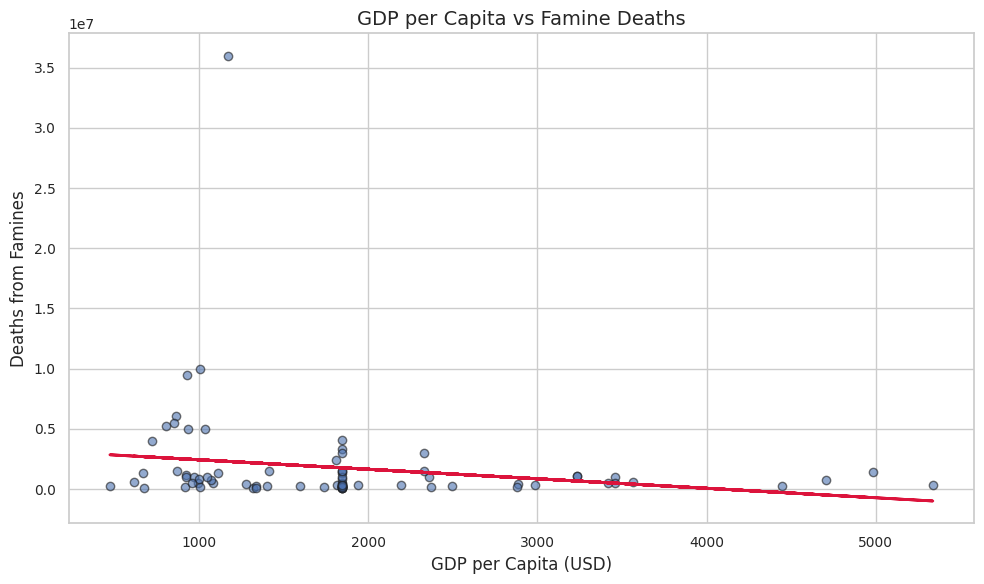

In [7]:
def scatter_regression(df):
    """
    Plot a scatter of GDP per capita vs famine deaths and overlay a linear regression line.
    """
    X = df[['GDP per capita']]
    y = df['Deaths from famines']
    # Fit linear model
    model = LinearRegression().fit(X, y)
    y_pred = model.predict(X)
    
    # Scatter plot
    plt.scatter(df['GDP per capita'], y, alpha=0.6, edgecolor='k')
    # Regression line
    plt.plot(df['GDP per capita'], y_pred, color='crimson', lw=2)
    plt.title("GDP per Capita vs Famine Deaths")
    plt.xlabel("GDP per Capita (USD)")
    plt.ylabel("Deaths from Famines")
    plt.tight_layout()
    plt.show()

# Show relationship between wealth and famine impact
scatter_regression(df)

### Key Findings
- Countries with lower GDP per capita (below 2000 USD) exhibit a wide range of famine deaths, from 0 to over 3 million.
- As GDP per capita increases (above 2000 USD), famine deaths tend to decrease, with most data points clustering closer to 0.
- An outlier exists at around 1000 USD with approximately 3.5 million famine deaths.
- The trend line slopes downward, indicating a negative correlation between GDP per capita and famine deaths.

## 7. Stacked Area Chart of Deaths by Cause
_Time‑series area plot showing famine deaths each decade broken down by principal cause._


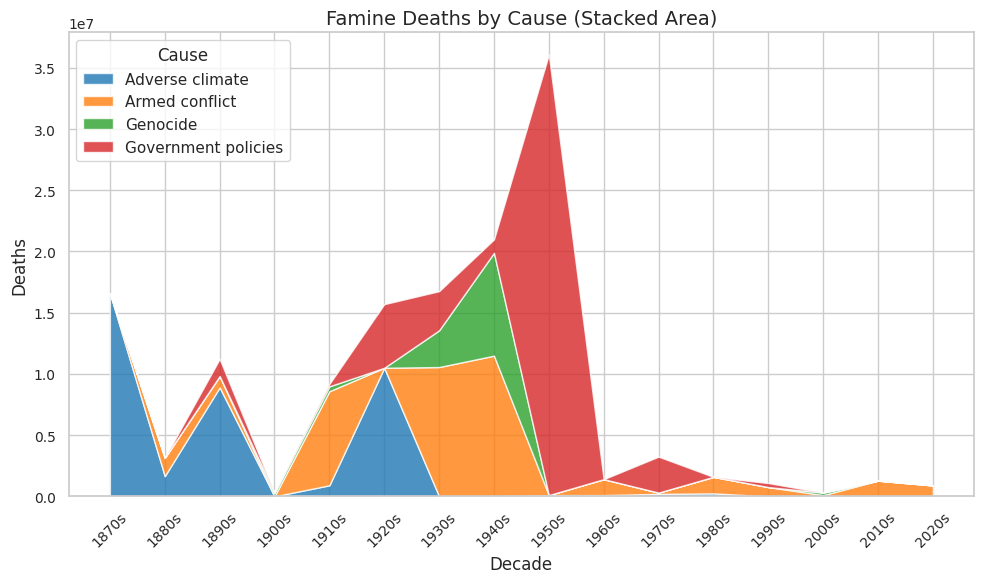

In [8]:
def stacked_area_causes(df):
    """
    Plot a stacked area chart showing famine deaths per decade, broken down by principal cause.
    """
    # Aggregate deaths by decade and cause
    agg = df.groupby(['Decade', 'Principal cause'])['Deaths from famines'] \
            .sum().unstack(fill_value=0)
    decades = agg.index
    causes = agg.columns
    # Select colors for each cause
    colors = sns.color_palette("tab10", len(causes))
    
    # Draw stacked area
    plt.stackplot(decades, agg.T, labels=causes, colors=colors, alpha=0.8)
    plt.legend(title="Cause", loc='upper left')
    plt.title("Famine Deaths by Cause (Stacked Area)")
    plt.xlabel("Decade")
    plt.ylabel("Deaths")
    plt.xticks(decades, [f"{d}s" for d in decades], rotation=45)
    plt.tight_layout()
    plt.show()

# Show long-term trends by cause
stacked_area_causes(df)

### Key findings
- The 1930s saw the highest famine deaths, predominantly due to government policies, with a significant contribution from genocide.
- Adverse climate was a major factor in the 1870s but diminished over time.
- Armed conflict showed moderate influence, peaking in the early 20th century.
- By the 2020s, famine deaths have significantly decreased across all causes.

## 8. Small‑Multiples of Deaths Over Time
_Individual line subplots per cause to compare trends side by side across decades._


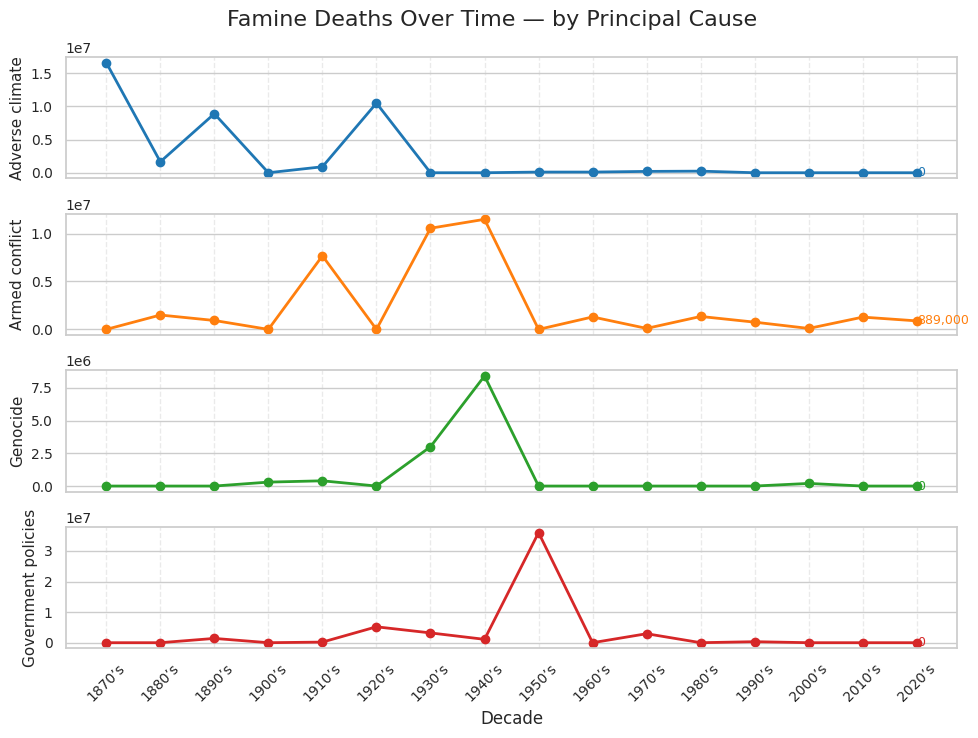

In [9]:
def small_multiples_causes(df):
    """
    Create small-multiple line plots to compare famine deaths over time
    for each principal cause in its own subplot.
    """
    # Prepare aggregated data
    df['Decade'] = (df['Year'] // 10 * 10).astype(int)
    agg = df.groupby(['Decade', 'Principal cause'])['Deaths from famines'] \
            .sum().unstack(fill_value=0)
    decades = agg.index.tolist()
    causes = agg.columns.tolist()

    # Setup figure with one row per cause
    fig, axes = plt.subplots(len(causes), 1, figsize=(10, 2 * len(causes)), sharex=True)
    colors = sns.color_palette("tab10", n_colors=len(causes))
    
    # Plot each subplot
    for ax, cause, color in zip(axes, causes, colors):
        ax.plot(decades, agg[cause], marker='o', color=color, linewidth=2)
        ax.set_ylabel(cause, fontsize=11)
        ax.grid(axis='x', linestyle='--', alpha=0.4)
        # Label the last data point
        ax.text(
            decades[-1], agg[cause].iloc[-1],
            f"{int(agg[cause].iloc[-1]):,}",
            va='center', ha='left', fontsize=9, color=color
        )

    # Format x-axis on bottom plot
    axes[-1].set_xticks(decades)
    axes[-1].set_xticklabels([f"{d}’s" for d in decades], rotation=45)
    axes[-1].set_xlabel("Decade", fontsize=12)

    # Main title and layout adjustments
    fig.suptitle("Famine Deaths Over Time — by Principal Cause", y=0.92, fontsize=16)
    plt.tight_layout(rect=[0, 0, 1, 0.95])
    plt.show()

# Compare causes individually
small_multiples_causes(df)

### Key Findings

#### Adverse Climate (Blue Line)
- Peaks in the 1870s and 1920s, reaching approximately 1.5 million deaths.
- Significant decline after the 1920s, stabilizing at around 0.1 million deaths from the 1950s onward.

#### Armed Conflict (Orange Line)
- Notable increase in the 1910s and 1920s, peaking at around 1 million deaths.
- Gradual decline post-1920s, with a slight resurgence in the 2010s to approximately 0.89 million deaths.

#### Genocide (Green Line)
- Relatively stable at low levels (around 0.1 million deaths) until a sharp rise in the 1940s, peaking at 7.5 million deaths.
- Declines sharply after the 1940s, stabilizing at around 0.1 million deaths from the 1950s onward.

#### Government Policies (Red Line)
- Minimal impact until the 1930s, with a dramatic peak in the 1940s at around 3 million deaths.
- Declines sharply post-1940s, remaining low and stable at around 0.1 million deaths thereafter.

## 9. Choropleth Map of Famine Deaths by Country
_Interactive world map summarizing total famine deaths per nation._


In [10]:
def choropleth_map(df):
    """
    Create an interactive choropleth map of total famine deaths by country.
    """
    # Sum deaths per country
    deaths = df.groupby('Country')['Deaths from famines'].sum().reset_index()
    # Build and display the Plotly choropleth
    fig = px.choropleth(
        deaths, 
        locations='Country', 
        locationmode='country names',
        color='Deaths from famines',
        title='Famine Deaths by Country',
    )
    fig.show()

# Render the world map visualization
choropleth_map(df)

### Key Findings

- **Highest Impact Areas**: China stands out with the highest estimated famine deaths, marked in yellow (approximately 60 million). India and parts of Russia also show significant mortality, shaded in red to orange (40M–50M).
- **Moderate Impact Regions**: Parts of Africa, Southeast Asia, and South America are shaded in blue to purple (10M–30M), indicating substantial but lower famine-related deaths compared to the peak areas.
- **Low Impact Areas**: North America, Europe, and Australia appear in light or unshaded tones, suggesting minimal or no significant famine deaths.
- **Geographical Distribution**: The data highlights a concentration of severe famine effects in Asia, with notable occurrences in Africa and South America, while developed regions show resilience.